In [15]:
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

from datetime import date
from mpr.reports.cash_index import get_cash_prices

cash_prices = await get_cash_prices(date(2019, 1, 1))

In [16]:
# What were the average prices for the last 10 days?
cash_prices[['Daily Avg Price', 'Price Change', 'CME Index', 'Index Change']].tail(10)

,Daily Avg Price,Price Change,CME Index,Index Change
date,,,,
2019-02-14,54.89,-0.27,55.02,-0.22
2019-02-15,54.64,-0.25,54.74,-0.28
2019-02-18,54.08,-0.56,54.43,-0.31
2019-02-19,54.19,0.11,54.13,-0.30
2019-02-20,53.93,-0.26,54.06,-0.07
2019-02-21,53.40,-0.53,53.65,-0.41
2019-02-22,52.92,-0.48,53.13,-0.52
2019-02-25,52.73,-0.19,52.85,-0.28
2019-02-26,52.88,0.15,52.82,-0.03


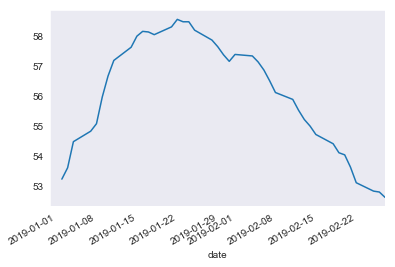

In [17]:
# Plot the CME Index on a chart
cash_prices.get('CME Index').plot()

In [18]:
# view the full report for the month of February
cash_prices.query("date >= '2019-02-01'")

,Negotiated Head Count,Negotiated Carcass Weight,Negotiated Net Price,Market Formula Head Count,Market Formula Carcass Weight,Market Formula Net Price,Daily Avg Price,Price Change,CME Index,Index Change
date,,,,,,,,,,
2019-02-01,12771,205.41,53.26,256439,216.06,57.65,57.45,0.12,57.41,0.23
2019-02-04,7196,210.47,51.39,136772,215.02,57.48,57.18,-0.27,57.36,-0.05
2019-02-05,6711,199.08,51.89,139497,212.83,57.37,57.13,-0.05,57.16,-0.20
2019-02-06,7472,203.65,51.90,140167,215.30,56.89,56.65,-0.48,56.89,-0.27
2019-02-07,7226,192.65,52.40,131114,214.80,56.60,56.40,-0.25,56.53,-0.36
2019-02-08,17320,205.41,52.54,209556,215.85,56.25,55.98,-0.42,56.14,-0.39
2019-02-11,8912,204.93,51.51,125080,214.30,56.07,55.78,-0.20,55.91,-0.23
2019-02-12,8003,203.02,50.77,128503,213.55,55.59,55.32,-0.46,55.55,-0.36
2019-02-13,5857,194.79,51.34,143189,215.33,55.30,55.16,-0.16,55.24,-0.31
